In [85]:
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
from numpy import dot, cosh, tanh, log, exp

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('mldata.csv')

print(df.head()) 
df_array = df.values
df_array[:, 2] = df.iloc[:, 2]

   1.8985625210050046  4.1361552124536445  1
0            2.019088           -1.646162  1
1           -1.343676           -2.010283  2
2           -2.728415           -4.055331  2
3           -2.361083           -3.432763  2
4            2.113689           -1.907397  1


# Problem 2- Part a

In [53]:
def sigma(y):
    return 0.5 * (1 + tanh(y))

def lost_func(omega, data, s=1):
    df_size = data.shape[0]
    p_dw = np.zeros(df_size)
    for i in range(df_size):
        x = data[i, :3] 
        if data[i, 2] == 1.:
            p_dw[i] = sigma(x @ omega)
        else:
            p_dw[i] = 1 - sigma(x @ omega - omega[2])
    
    return -np.sum(log(p_dw)) + dot(omega, omega) / (2 * s * s)

In [54]:
initial_omega = np.array([1, 1, 1])
result = minimize(lambda omega: lost_func(omega, df_array), initial_omega)

# Extract the optimal value of omega
optimal_omega = result.x
print(f"Best fit for omega* = {optimal_omega} and the lost function(omega*) = {lost_func(optimal_omega, df_array)}")

Best fit for omega* = [0.99637373 1.14135039 2.04369452] and the lost function(omega*) = 8.13890139119979


In [55]:
def grad_func(omega, p_dw, s=1):
    df_size = p_dw.shape[0]
    s2 = s * s
    sequence = np.zeros(df_size)
    for i in range(df_size):
        x = p_dw[i, :3] 
        if p_dw[i, 2] == 1.:
            if sigma(x @ omega) == 0:
                continue
            sequence[i] = -1 / sigma(x @ omega) / cosh(x @ omega)**2 / 2
        elif p_dw[i, 2] == 2.:
            if sigma(x @ omega - omega[2]) == 1:
                continue
            sequence[i] = 1 / (1 - sigma(x @ omega - omega[2])) / cosh(x @ omega - omega[2])**2 / 2 
    
    return np.array([np.sum(sequence) * x[0] + omega[0] / s2, 
                     np.sum(sequence)* x[1] + omega[1] / s2,
                     np.sum(sequence) + omega[2] / s2])

def gradient_descent(initial_params, learning_rate, max_iter, tol, p_dw, s=1):
    params = initial_params.copy()
    for _ in range(max_iter):
        gradient = grad_func(params, p_dw, s)
        params -= learning_rate * gradient
        if np.linalg.norm(gradient) < tol:
            break
    return params

# Example usage
initial_params = np.array([1, 1., 2])
learning_rate = 0.00001
max_iter = 10_000
tol = 1e-6

omega_star = gradient_descent(initial_params, learning_rate, max_iter, tol, df_array, s=1)
print(f"Best fit for omega* = {np.round(omega_star, 6)} and the lost function(omega*) = {np.round(lost_func(omega_star, df_array), 6)}")


Best fit for omega* = [1.098806 1.069351 1.962095] and the lost function(omega*) = 9.069463


# Part C

In [56]:
x_A = np.array([-1, -4, 1])
x_B = np.array([-1, -1, 1])
x_C = np.array([-1, 3, 1])
print(f"The prob. of A to be in state one = {np.round(sigma(x_A @ omega_star), 4)}\n", 
    f"The prob. of B to be in state one = {np.round(sigma(x_B @ omega_star), 4)}\n",
    f"The prob. of C to be in state one = {np.round(sigma(x_C @ omega_star), 4)}")

The prob. of A to be in state one = 0.0011
 The prob. of B to be in state one = 0.3984
 The prob. of C to be in state one = 0.9997


# Part D

In [57]:
s = 0.1
initial_params = np.array([1, 1., 2])
learning_rate = 0.00001
max_iter = 10_000
tol = 1e-6

omega_star = gradient_descent(initial_params, learning_rate, max_iter, tol, df_array, s)
print(f"Best fit for omega* = {np.round(omega_star, 6)} and the lost function(omega*) = {np.round(lost_func(omega_star, df_array), 6)}")
x_A = np.array([-1, -4, 1])
x_B = np.array([-1, -1, 1])
x_C = np.array([-1, 3, 1])
print(f"The prob. of A to be in state one = {np.round(sigma(x_A @ omega_star), 4)}\n", 
      f"The prob. of B to be in state one = {np.round(sigma(x_B @ omega_star), 4)}\n",
      f"The prob. of C to be in state one = {np.round(sigma(x_C @ omega_star), 4)}")

Best fit for omega* = [0.247731 0.21012  0.194723] and the lost function(omega*) = 28.336434
The prob. of A to be in state one = 0.1434
 The prob. of B to be in state one = 0.3714
 The prob. of C to be in state one = 0.7604


In [58]:
s = 10.0
initial_params = np.array([1, 1., 2])
learning_rate = 0.00001
max_iter = 10_000
tol = 1e-6

omega_star = gradient_descent(initial_params, learning_rate, max_iter, tol, df_array, s)
print(f"Best fit for omega* = {np.round(omega_star, 6)} and the lost function(omega*) = {np.round(lost_func(omega_star, df_array), 6)}")
x_A = np.array([-1, -4, 1])
x_B = np.array([-1, -1, 1])
x_C = np.array([-1, 3, 1])
print(f"The prob. of A to be in state one = {np.round(sigma(x_A @ omega_star), 4)}\n", 
    f"The prob. of B to be in state one = {np.round(sigma(x_B @ omega_star), 4)}\n",
    f"The prob. of C to be in state one = {np.round(sigma(x_C @ omega_star), 4)}")

Best fit for omega* = [1.197109 1.167025 2.153675] and the lost function(omega*) = 9.164657
The prob. of A to be in state one = 0.0006
 The prob. of B to be in state one = 0.3963
 The prob. of C to be in state one = 0.9999


# HW 3 

## Part a

In [78]:
rng = np.random.default_rng()
size_ensemble = 100_000
omega_arr = np.zeros((size_ensemble, 3))
omega_arr[0] = np.array([1, 1, 1])

for i in range(1, size_ensemble):
    rand = 0.05 * (rng.random(3) - 0.5)
    rho = exp(-(lost_func(omega_arr[i-1] + rand, df_array)
                - lost_func(omega_arr[i-1], df_array)))
    if rho >= 1:
        omega_arr[i] = omega_arr[i-1] + rand
    else:
        r = rng.random()
        if r < rho:
            omega_arr[i] = omega_arr[i-1] + rand
        else:
            omega_arr[i] = omega_arr[i-1]

In [80]:
average_omega = np.mean(omega_arr, axis =0)
print(f"The average omega is {average_omega}\n", 
      'the ratio of omega_mean / omega_star = {}'.format(np.round(average_omega/ omega_star, 5)))

The average omega is [1.00742273 1.15062882 2.03558615]
 the ratio of omega_mean / omega_star = [0.84155 0.98595 0.94517]


## Par D

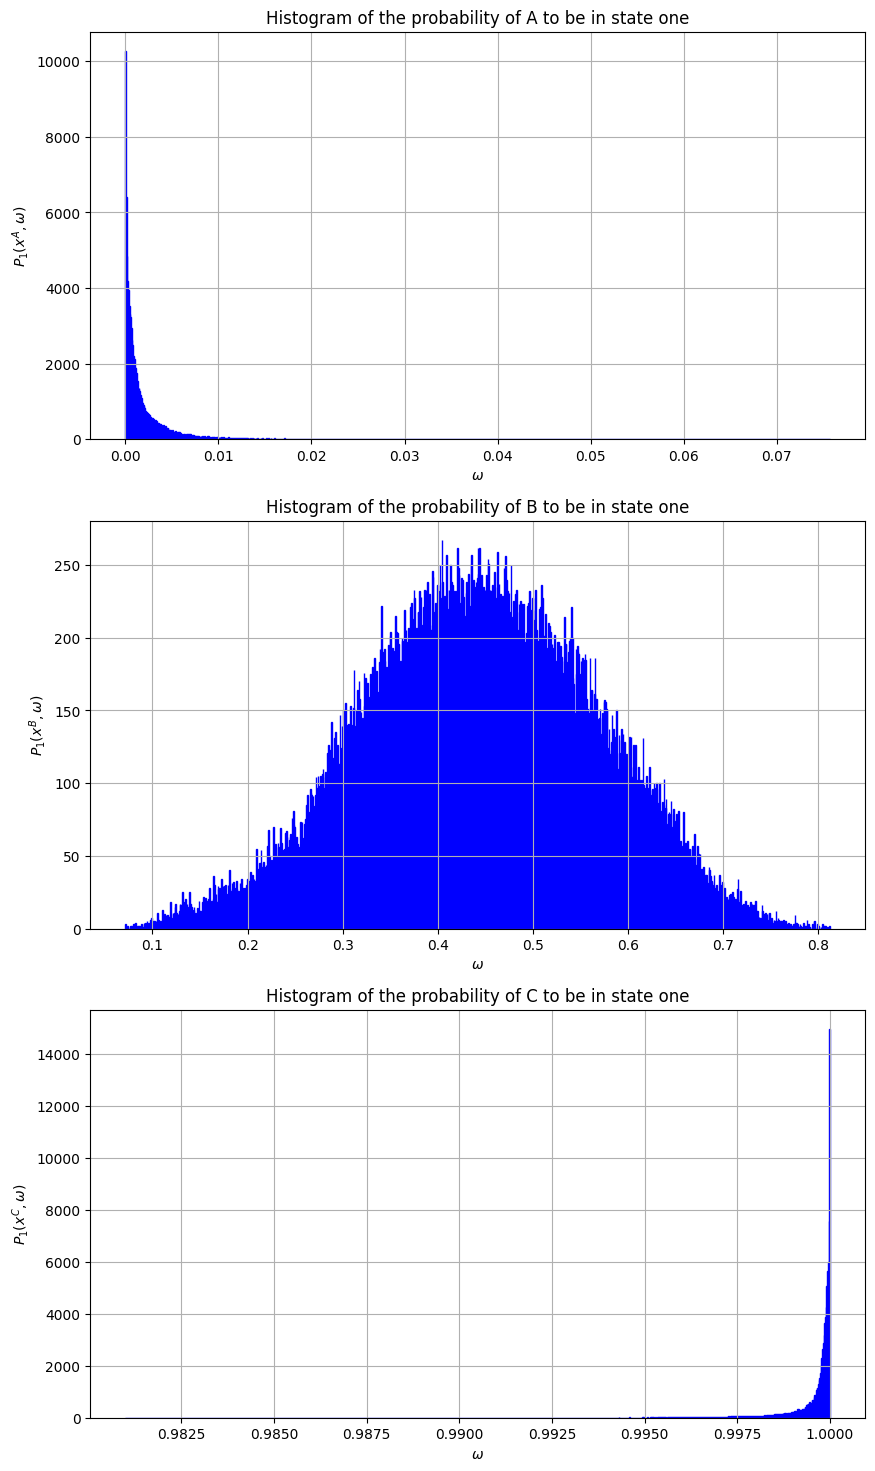

In [99]:
x_B = np.array([-1, -1])
arg_B = x_B[0] * omega_arr[:, 0] + x_B[1] * omega_arr[:, 1] + omega_arr[:, 2] 
p_1_B = sigma(arg_B)

x_A = np.array([-1, -4])
arg_A = x_A[0] * omega_arr[:, 0] + x_A[1] * omega_arr[:, 1] + omega_arr[:, 2] 
p_1_A = sigma(arg_A)

x_C = np.array([-1, 3])
arg_C = x_C[0] * omega_arr[:, 0] + x_C[1] * omega_arr[:, 1] + omega_arr[:, 2] 
p_1_C = sigma(arg_C)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 18))

ax1.hist(p_1_A, bins=1000, edgecolor='blue')  
ax1.set_title('Histogram of the probability of A to be in state one')
ax1.set_xlabel('$\omega$')
ax1.set_ylabel('$P_1(x^A , \omega)$')
ax1.grid(True)

ax2.hist(p_1_B, bins=1000, edgecolor='blue')  
ax2.set_title('Histogram of the probability of B to be in state one')
ax2.set_xlabel('$\omega$')
ax2.set_ylabel('$P_1(x^B , \omega)$')
ax2.grid(True)


ax3.hist(p_1_C, bins=1000, edgecolor='blue')  
ax3.set_title('Histogram of the probability of C to be in state one')
ax3.set_xlabel('$\omega$')
ax3.set_ylabel('$P_1(x^C , \omega)$')
ax3.grid(True)

